##### Tutorial from datacamp about the creation of wordclouds

In [73]:
import pandas as pd 
import numpy as np

!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [7]:
data = pd.read_csv("./winemag-data-130k-v2.csv",index_col=0)

In [8]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [9]:
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [10]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [22]:
#basic info 
print('There are {} number of observations \n'.format(len(data)))
print('There are {} different types of wines '.format(len(data['variety'].unique())))
print('from {} different countries \n'.format(len(data.country.unique())))
print('and the points they get as a score vary from {} to {}'.format(min(data.points),max(data.points)))

There are 129971 number of observations 

There are 708 different types of wines 
from 44 different countries 

and the points they get as a score vary from 80 to 100


In [37]:
#groupby country
country = data.groupby('country')
country.describe().head(3)


points                                                        \
            count       mean       std   min    25%   50%    75%    max   
country                                                                   
Argentina  3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   97.0   
Armenia       2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   88.0   
Australia  2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00  100.0   

            price                                                         
            count       mean        std   min    25%   50%    75%    max  
country                                                                   
Argentina  3756.0  24.510117  23.430122   4.0  12.00  17.0  25.00  230.0  
Armenia       2.0  14.500000   0.707107  14.0  14.25  14.5  14.75   15.0  
Australia  2294.0  35.437663  49.049458   5.0  15.00  21.0  38.00  850.0

In [42]:
#highest average points countries
country.mean().sort_values(by='points',ascending=False)['points'].head(5)

country
England    91.581081
India      90.222222
Austria    90.101345
Germany    89.851732
Canada     89.369650
Name: points, dtype: float64

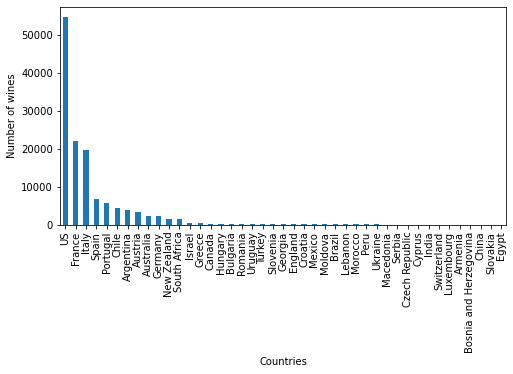

In [52]:
#plot number of wines by country--> bar or boxplot
plt.figure(figsize = (8,4))
country.size().sort_values(ascending=False).plot.bar()
plt.xlabel('Countries')
plt.ylabel('Number of wines')
plt.show()
#US and France have the most wines but England and India have the best scores. So quantity does not necessarily mean quality.


<Figure size 1080x720 with 0 Axes>

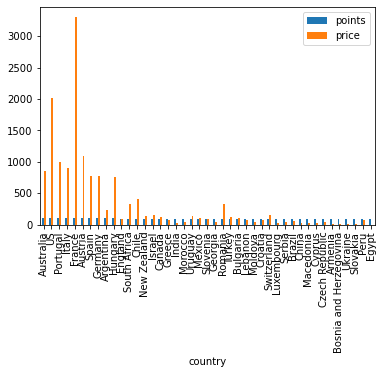

In [62]:
plt.figure(figsize=(15,10))
country.max().sort_values(by='points',ascending = False).plot.bar()
plt.show()

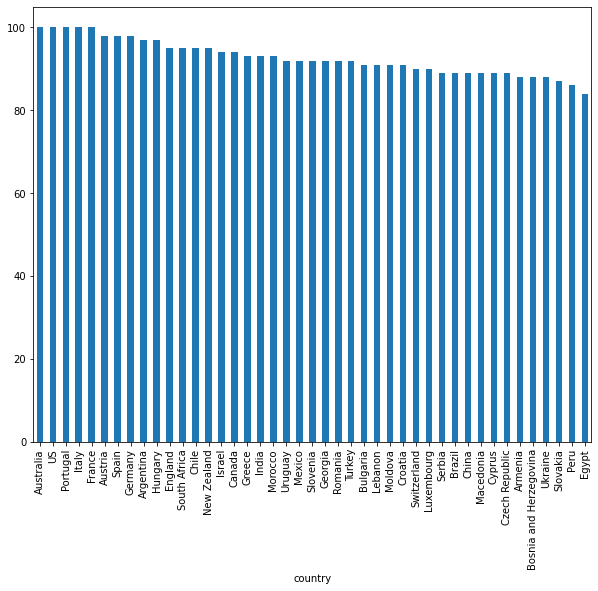

In [64]:
plt.figure(figsize=(10,8))
country.max().sort_values(by='points',ascending = False)['points'].plot.bar()
plt.show()

In [66]:
data.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

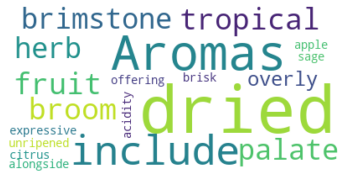

In [81]:
#take a text
text = data.description[0]
#create a wordcloud
wordcloud0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
#show image 
plt.imshow(wordcloud0,interpolation='bilinear')
plt.axis('off')
plt.show()


In [83]:
wordcloud0.to_file("Images/first_review.png")

In [ ]:
#Combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.
text = "".join(x for x in data.description)
# text

In [86]:
print('There are {} words in this huge text '.format(len(text)))

There are 31531103 words in this huge text 


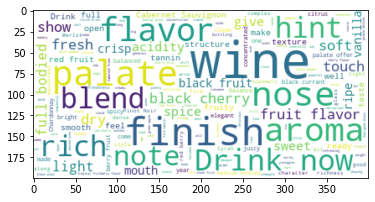

In [87]:
#create the word cloud
wordcloud_final = WordCloud(background_color='white',max_font_size=60).generate(text)
plt.imshow(wordcloud_final,interpolation='bilinear')
plt.show()

In [89]:
wordcloud_final.to_file('Images/Reviews_with_stopwords.png')

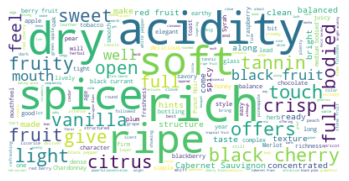

In [96]:
#however there are some stopwords which are not necessary so we are going to drop them 
stopwords = set(STOPWORDS)
stopwords
#in this list we are going to add our own stopwords that we think are not necessary
stopwords.update(["drink", "now", "wine", "flavor", "flavors","nose","aroma","finish","aromas","palate","note","hint","show","notes","blend","shows","fresh","offer"])
#so now let's create the wordcloud again
wordcloud_final = WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.imshow(wordcloud_final,interpolation='bilinear')
plt.axis("off")
plt.show()


In [99]:
#get image to use online
import requests
from io import BytesIO
response = requests.get('http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530033379/wine_mask_xgk1tq.png')
img = np.array(Image.open(BytesIO(response.content)))
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)